<a href="https://colab.research.google.com/github/ImenMasmoudiEm/CCKInternshipProject/blob/main/CCK_Project_Article's_approach012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification

##Connecting to drive & importing data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
os.chdir('/content/drive/MyDrive/All/Projects/Ing Internship/Data')

In [3]:
import pandas as pd
data=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/final-dataset.xlsx")
data

,commentaire,classe
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,normal
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,hate
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,normal
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,hate
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,hate
...,...,...
23028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,hate
23029,وبلدك سوريا لا تبغي سوا القتل والاجرام,hate
23030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,normal
23031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,normal


##Data Preprocessing

1/ Changing the Class into bin

In [4]:
data['classe']=data['classe'].replace("hate", int(2)) #Change it to 2
data['classe']=data['classe'].replace("normal", int(0)) 
data['classe']=data['classe'].replace("abusive", int(1))

In [5]:
data

,commentaire,classe
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,0
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,2
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,0
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,2
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,2
...,...,...
23028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,2
23029,وبلدك سوريا لا تبغي سوا القتل والاجرام,2
23030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,0
23031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,0


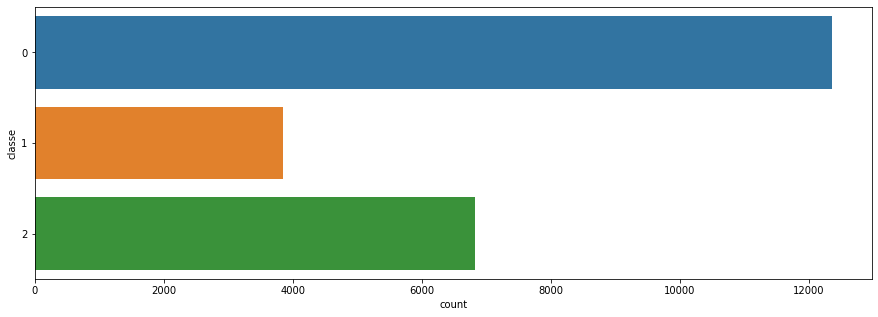

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data)
plt.show()

In [7]:
print(data.loc[data.classe==0].groupby('classe')["classe"].count())
print(data.loc[data.classe==1].groupby('classe')["classe"].count())
print(data.loc[data.classe==2].groupby('classe')["classe"].count())

classe
0    12353
Name: classe, dtype: int64
classe
1    3850
Name: classe, dtype: int64
classe
2    6830
Name: classe, dtype: int64


2/ NLP Data Preparations

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

sentences = []
labels = []

sentences = data['commentaire']
labels = data['classe']
L=[]
#for i in labels:
#  if (i != '1') and (i != '0'):
#    L.append(i)

labels = [int(i) for i in labels]
#L

In [9]:
i=0
c=0
Nlables=[]
Nsentences=[]
while (c<6000):
  if (labels[i]!= 0):
    Nlables.append(labels[i])
    Nsentences.append(sentences[i])
  else:
    c+=1
  i+=1
while (i<len(labels)):
  Nlables.append(labels[i])
  Nsentences.append(sentences[i])
  i+=1


In [10]:
import pandas as pd

data=[[i,j] for i,j in zip(Nsentences , Nlables)]

data=pd.DataFrame(data,columns=["sentences","classe"])

data

,sentences,classe
0,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,2
1,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,2
2,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,2
3,أنت أزاي لبؤة كدة ؟,1
4,دول عبيد باسم !! انت ما تعرفش غير ستات كده يعن...,2
...,...,...
17028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,2
17029,وبلدك سوريا لا تبغي سوا القتل والاجرام,2
17030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,0
17031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,0


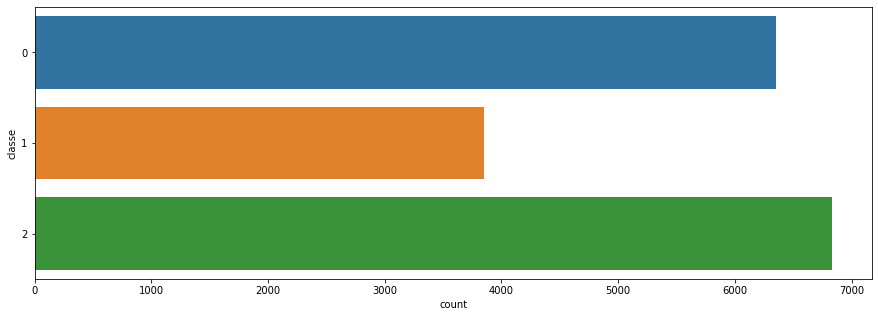

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data)
plt.show()

In [12]:
#Figure out the longest comment

def count_words(input):
  return len(input.split())
max_length=count_words(max(Nsentences,key=count_words))
max_length+=2
max_length

209

##The way that the computers percieve words and phrases is diffrent from the way that we preceve it as human beings. There are a veriety of ways for us that we can utilise to program the data type that we have and to make it numerical so that the model can get some meaning out of it. We call this part encoding text.
##we can transfor each alphabet and caracter to it's ASCII Code, but this approach wasn't proven to give great results [To Research] !!!
#What I did in the code was: Continus or distributed Embeddings Vectors representation:
* First: Build a dictionary of tokens: I defined a dictionnary That has the words as keys and a unique number as a value
* I then changed all of the phrases into Lists that has integers that indicate which word is in that particular place
* Use One-Hot Vector

##After doing this process, we have a numerical data that the model can use to get some meaning out of the labels

In [14]:
training_size=int(len(Nsentences)*0.9)   #Experimenting setup

training_sentences = Nsentences[0:training_size]
testing_sentences = Nsentences[training_size:]
training_labels = Nlables[0:training_size]
testing_labels = Nlables[training_size:]

embedding_dim = 16

tokenizer = Tokenizer(num_words=2000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

vocab_size = len(tokenizer.word_index) + 1 

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding='post', truncating='post')

#Modelling

##For The First Model

In [ ]:
import tensorflow as tf

model=tf.keras.models.Sequential ([
                                   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                   tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                   tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='selu'),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(units=3, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 209, 16)           621328    
                                                                 
 conv1d (Conv1D)             (None, 205, 128)          10368     
                                                                 
 conv1d_1 (Conv1D)           (None, 205, 32)           4128      
                                                                 
 bidirectional (Bidirectiona  (None, 205, 64)          16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 205, 64)          24832     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 205, 32)          1

In [ ]:
#For the First Model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'],run_eagerly=True)

training_padded = np.asarray(training_padded).astype(np.int)
training_labels = np.asarray(training_labels).astype(np.int)
testing_padded = np.asarray(testing_padded).astype(np.int)
testing_labels = np.asarray(testing_labels).astype(np.int)

#training_padded = np.expand_dims(training_padded, axis=1)
training_labels = np.expand_dims(training_labels, axis=1)
#testing_padded = np.expand_dims(testing_padded, axis=1)
testing_labels = np.expand_dims(testing_labels, axis=1)

history = model.fit(training_padded, training_labels, batch_size=128, epochs=15, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

120/120 [==============================] - 25s 108ms/step - loss: 0.9205 - accuracy: 0.5372 - val_loss: 0.9845 - val_accuracy: 0.5728
Epoch 2/15
120/120 [==============================] - 13s 110ms/step - loss: 0.6525 - accuracy: 0.7237 - val_loss: 0.9017 - val_accuracy: 0.6520
Epoch 3/15
120/120 [==============================] - 13s 108ms/step - loss: 0.5179 - accuracy: 0.7954 - val_loss: 0.7785 - val_accuracy: 0.7066
Epoch 4/15
120/120 [==============================] - 13s 108ms/step - loss: 0.4511 - accuracy: 0.8203 - val_loss: 0.7752 - val_accuracy: 0.7230
Epoch 5/15
120/120 [==============================] - 12s 103ms/step - loss: 0.4087 - accuracy: 0.8383 - val_loss: 0.7330 - val_accuracy: 0.7377
Epoch 6/15
120/120 [==============================] - 12s 103ms/step - loss: 0.3859 - accuracy: 0.8483 - val_loss: 0.7293 - val_accuracy: 0.7488
Epoch 7/15
120/120 [==============================] - 13s 112ms/step - loss: 0.3471 - accuracy: 0.8639 - val_loss: 0.7765 - val_accuracy: 0.7

In [ ]:
history = model.fit(training_padded, training_labels, batch_size=128, epochs=10, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/10
120/120 [==============================] - 13s 107ms/step - loss: 0.1900 - accuracy: 0.9250 - val_loss: 0.8521 - val_accuracy: 0.7835
Epoch 2/10
120/120 [==============================] - 14s 116ms/step - loss: 0.1844 - accuracy: 0.9285 - val_loss: 0.7585 - val_accuracy: 0.8263
Epoch 3/10
120/120 [==============================] - 13s 108ms/step - loss: 0.1761 - accuracy: 0.9303 - val_loss: 0.8145 - val_accuracy: 0.8122
Epoch 4/10
120/120 [==============================] - 12s 102ms/step - loss: 0.1708 - accuracy: 0.9303 - val_loss: 0.6984 - val_accuracy: 0.8116
Epoch 5/10
120/120 [==============================] - 13s 107ms/step - loss: 0.1615 - accuracy: 0.9324 - val_loss: 0.7410 - val_accuracy: 0.8034
Epoch 6/10
120/120 [==============================] - 12s 102ms/step - loss: 0.1650 - accuracy: 0.9329 - val_loss: 0.8447 - val_accuracy: 0.8016
Epoch 7/10
120/120 [==============================] - 12s 102ms/step - loss: 0.1549 - accuracy: 0.9357 - val_loss: 0.7827 - val_ac

In [ ]:
#Epoch 20/20
#144/144 [==============================] - 245s 2s/step - loss: 0.1099 - accuracy: 0.9551 - val_loss: 0.2792 - val_accuracy: 0.9184

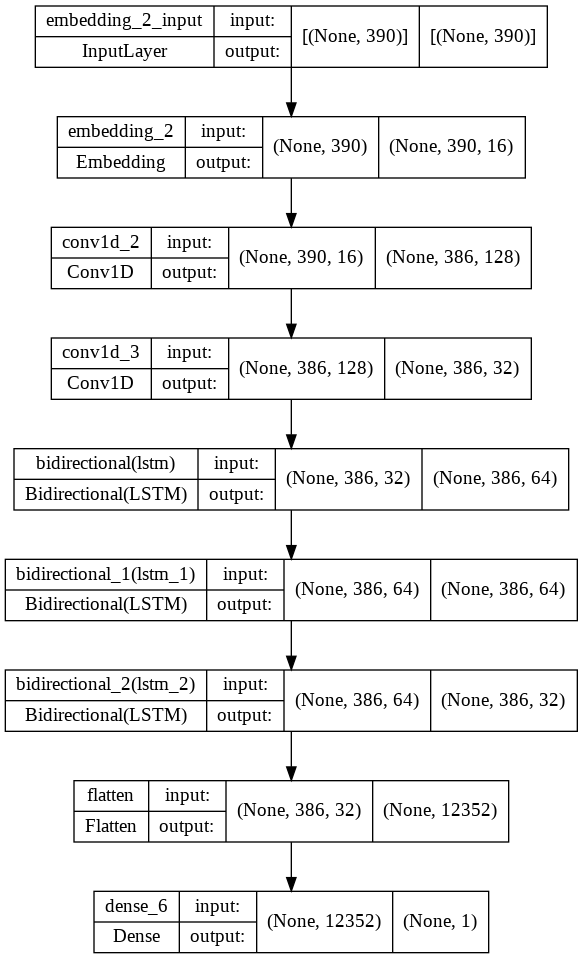

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
pred=model.predict(testing_padded)
rounded_labels1=np.argmax(pred, axis=1).astype(int)
rounded_labels1
cm = confusion_matrix(testing_labels, rounded_labels1)
cm

array([[776,  77, 169],
       [  6, 248,  23],
       [ 20,   4, 381]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(testing_labels, rounded_labels1, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1022
           1       0.75      0.90      0.82       277
           2       0.66      0.94      0.78       405

    accuracy                           0.82      1704
   macro avg       0.80      0.87      0.82      1704
weighted avg       0.86      0.82      0.83      1704



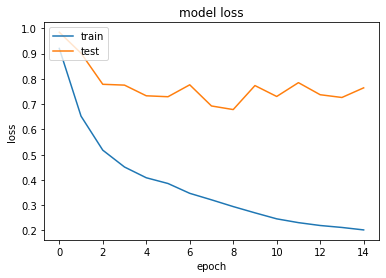

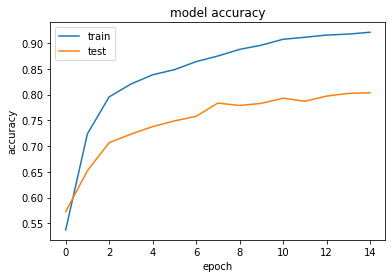

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##For the Second Model

In [ ]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 390, 16)           834688    
                                                                 
 conv1d (Conv1D)             (None, 386, 128)          10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 2)                 50        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                        

In [ ]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

training_padded = np.asarray(training_padded).astype(np.float)
training_labels = np.asarray(training_labels).astype(np.int)
testing_padded = np.asarray(testing_padded).astype(np.float)
testing_labels = np.asarray(testing_labels).astype(np.float)

history = model2.fit(training_padded, training_labels, batch_size=128, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/relea

144/144 [==============================] - 23s 153ms/step - loss: 0.6791 - accuracy: 0.5746 - val_loss: 0.5894 - val_accuracy: 0.7823
Epoch 2/50
144/144 [==============================] - 22s 151ms/step - loss: 0.5501 - accuracy: 0.7858 - val_loss: 0.5031 - val_accuracy: 0.8370
Epoch 3/50
144/144 [==============================] - 25s 177ms/step - loss: 0.5000 - accuracy: 0.8202 - val_loss: 0.4662 - val_accuracy: 0.8524
Epoch 4/50
144/144 [==============================] - 32s 224ms/step - loss: 0.4690 - accuracy: 0.8360 - val_loss: 0.4374 - val_accuracy: 0.8613
Epoch 5/50
144/144 [==============================] - 24s 168ms/step - loss: 0.4438 - accuracy: 0.8475 - val_loss: 0.4180 - val_accuracy: 0.8635
Epoch 6/50
144/144 [==============================] - 22s 150ms/step - loss: 0.4241 - accuracy: 0.8560 - val_loss: 0.4044 - val_accuracy: 0.8646
Epoch 7/50
144/144 [==============================] - 21s 146ms/step - loss: 0.4061 - accuracy: 0.8630 - val_loss: 0.3937 - val_accuracy: 0.8

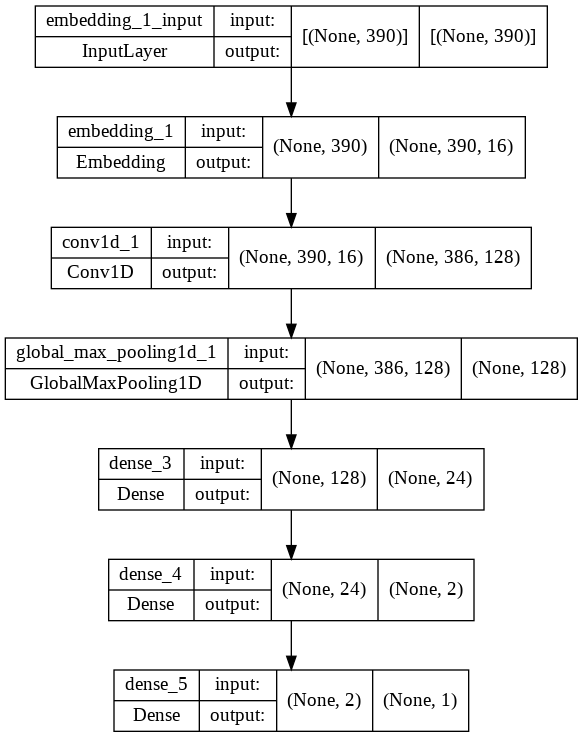

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
from sklearn.metrics import classification_report
pred=model2.predict(testing_padded).astype(int)
print(classification_report(testing_labels, pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74      2695
           1       0.00      0.00      0.00      1912

    accuracy                           0.58      4607
   macro avg       0.29      0.50      0.37      4607
weighted avg       0.34      0.58      0.43      4607



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


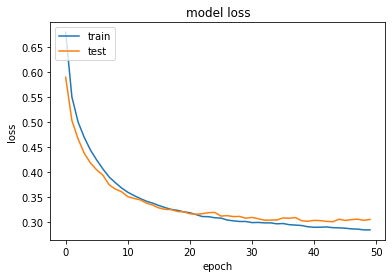

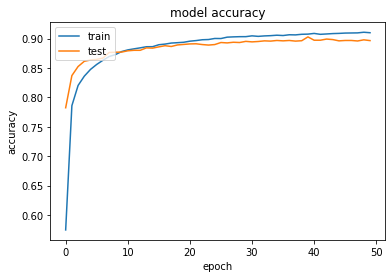

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##For The Third Model

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 390, 16)           834688    
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_11 (Dense)            (None, 24)                1560      
                                                                 
 dense_12 (Dense)            (None, 1)                 25        
                                                                 
Total params: 848,817
Trainable params: 848,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 390, 16)           834688    
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 24)                1560      
                                                                 
 dense_8 (Dense)             (None, 1)                 25        
                                                                 
Total params: 848,817
Trainable params: 848,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

training_padded = np.asarray(training_padded).astype(np.float)
training_labels = np.asarray(training_labels).astype(np.int)
testing_padded = np.asarray(testing_padded).astype(np.float)
testing_labels = np.asarray(testing_labels).astype(np.float)

history = model3.fit(training_padded, training_labels, batch_size=128, epochs=30, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and

144/144 [==============================] - 78s 485ms/step - loss: 0.5698 - accuracy: 0.7028 - val_loss: 0.3996 - val_accuracy: 0.8248
Epoch 2/30
144/144 [==============================] - 70s 486ms/step - loss: 0.4412 - accuracy: 0.8015 - val_loss: 0.3671 - val_accuracy: 0.8372
Epoch 3/30
144/144 [==============================] - 67s 465ms/step - loss: 0.4145 - accuracy: 0.8126 - val_loss: 0.3461 - val_accuracy: 0.8472
Epoch 4/30
144/144 [==============================] - 68s 470ms/step - loss: 0.3999 - accuracy: 0.8213 - val_loss: 0.3456 - val_accuracy: 0.8522
Epoch 5/30
144/144 [==============================] - 68s 470ms/step - loss: 0.3931 - accuracy: 0.8235 - val_loss: 0.3389 - val_accuracy: 0.8504
Epoch 6/30
144/144 [==============================] - 68s 470ms/step - loss: 0.3944 - accuracy: 0.8254 - val_loss: 0.3348 - val_accuracy: 0.8539
Epoch 7/30
144/144 [==============================] - 70s 483ms/step - loss: 0.3844 - accuracy: 0.8301 - val_loss: 0.3340 - val_accuracy: 0.8

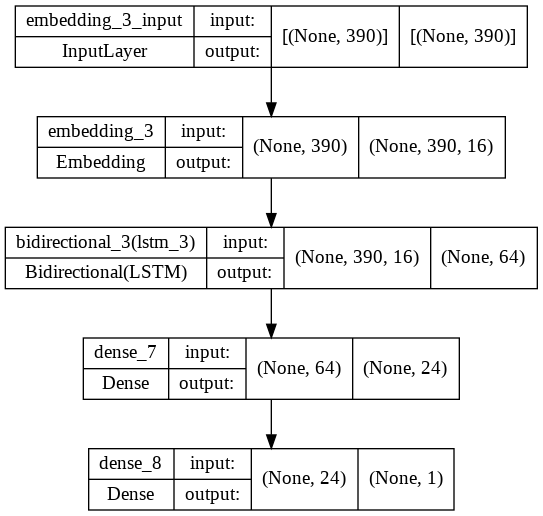

In [ ]:
tf.keras.utils.plot_model(model3, show_shapes=True)

In [ ]:
from sklearn.metrics import classification_report
pred=model3.predict(testing_padded).astype(int)
print(classification_report(testing_labels, pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74      2695
           1       0.00      0.00      0.00      1912

    accuracy                           0.58      4607
   macro avg       0.29      0.50      0.37      4607
weighted avg       0.34      0.58      0.43      4607



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


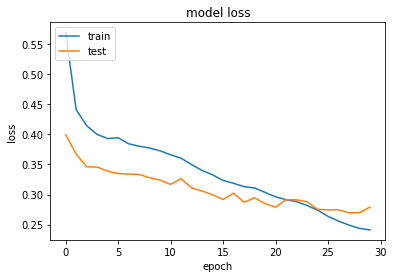

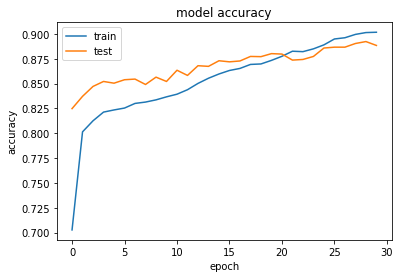

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

##Conclusion
###The accuracy for the three models is 58% yet the complexity varies. The first model has 913 377 trainale parameters which makes it the most complex amongs the three of them with the second having 848 205 trainable parameters and the third having 848 817 trainable parameters.
###After giving the problem a first look, we can suspect that:
* This is a deep Learning Problem where we need more data and a bigger model so we can track the pattern and better the model's accuracy
* Te model is not getting the pattern in the data well so this can be due to some data imbalence 
* We need to further explore our data and to create a bigger model

##Article's Approach

In [15]:
import numpy as np
EDtraining_padded=np.expand_dims(np.array(training_padded), axis=-1)
EDtesting_padded=np.expand_dims(np.array(testing_padded), axis=-1)
EDtraining_padded.shape

(15329, 209, 1)

In [16]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
EncoModel = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(209,1)),                             
    tf.keras.layers.Conv1D(32, 2, activation='relu', padding='same'),#Start Encoder
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(32, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=1, strides=2),
    tf.keras.layers.Conv1D(64, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(64, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=1, strides=2),
    tf.keras.layers.Conv1D(128, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(128, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(256, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(256, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(), #End Encoder
    tf.keras.layers.Conv1D(128, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(128, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(64, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(64, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.UpSampling1D(2),
    tf.keras.layers.Conv1D(32, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(32, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.UpSampling1D(2),
    tf.keras.layers.Conv1D(1, 4, activation='sigmoid')
])
EncoModel.summary()

EncoModel.compile(loss='mean_squared_error', optimizer = RMSprop(),metrics=['accuracy'])

EncoModel_train = EncoModel.fit(EDtraining_padded, EDtraining_padded, batch_size=32, epochs=25, verbose=1, validation_data=(EDtesting_padded, EDtesting_padded))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 209, 32)           96        
                                                                 
 batch_normalization (BatchN  (None, 209, 32)          128       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 209, 32)           2080      
                                                                 
 batch_normalization_1 (Batc  (None, 209, 32)          128       
 hNormalization)                                                 
                                                                 
 max_pooling1d (MaxPooling1D  (None, 105, 32)          0         
 )                                                               
                                                        

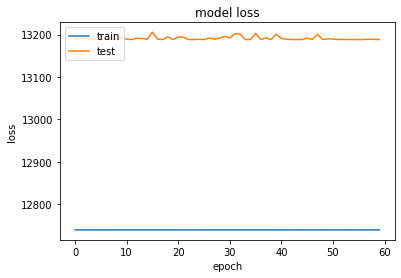

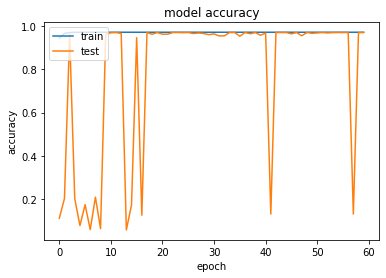

In [17]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(EncoModel_train.history['loss'])
plt.plot(EncoModel_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(EncoModel_train.history['accuracy'])
plt.plot(EncoModel_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

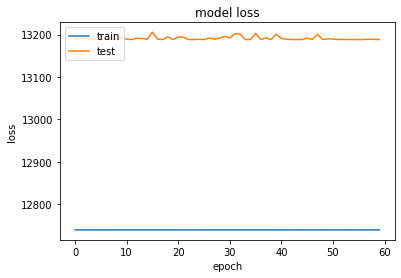

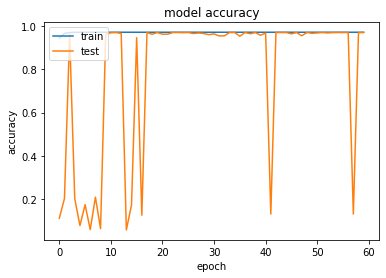

In [18]:
# summarize history for accuracy
plt.plot(EncoModel_train.history['loss'])
plt.plot(EncoModel_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(EncoModel_train.history['accuracy'])
plt.plot(EncoModel_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
FullModel = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(209,1)),                             
    tf.keras.layers.Conv1D(32, 2, activation='relu', padding='same'),#Start Encoder
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(32, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=1, strides=2),
    tf.keras.layers.Conv1D(64, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(64, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=1, strides=2),
    tf.keras.layers.Conv1D(128, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(128, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(256, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(256, 2, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(), #End Encoder 
    #Add LSTM + Embedding
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
FullModel.summary()
training_labels1=[]
testing_labels1=[]
for i in training_labels:
  if i == 0:
    training_labels1.append([1,0,0])
  elif i == 1:
    training_labels1.append([0,1,0])
  else:
    training_labels1.append([0,0,1])
for i in testing_labels:
  if i == 0:
    testing_labels1.append([1,0,0])
  elif i == 1:
    testing_labels1.append([0,1,0])
  else:
    testing_labels1.append([0,0,1])
for l1,l2 in zip(FullModel.layers[:18],EncoModel.layers[0:18]):
    l1.set_weights(l2.get_weights())
#First we train only the last three layers
for layer in FullModel.layers[0:18]:
    layer.trainable = False
    
FullModel.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

training_labels1 = np.asarray(training_labels1).astype(np.int)
testing_labels1 = np.asarray(testing_labels1).astype(np.int)

history = FullModel.fit(EDtraining_padded, training_labels1, batch_size=128, epochs=60, validation_data=(EDtesting_padded, testing_labels1), verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 209, 32)           96        
                                                                 
 batch_normalization_14 (Bat  (None, 209, 32)          128       
 chNormalization)                                                
                                                                 
 conv1d_16 (Conv1D)          (None, 209, 32)           2080      
                                                                 
 batch_normalization_15 (Bat  (None, 209, 32)          128       
 chNormalization)                                                
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 105, 32)          0         
 1D)                                                             
                                                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

120/120 [==============================] - 17s 127ms/step - loss: 0.7918 - accuracy: 0.4095 - val_loss: 0.6408 - val_accuracy: 0.4396
Epoch 2/60
120/120 [==============================] - 16s 138ms/step - loss: 0.6467 - accuracy: 0.4176 - val_loss: 0.6249 - val_accuracy: 0.4002
Epoch 3/60
120/120 [==============================] - 15s 122ms/step - loss: 0.6218 - accuracy: 0.4296 - val_loss: 0.6119 - val_accuracy: 0.4272
Epoch 4/60
120/120 [==============================] - 15s 123ms/step - loss: 0.6217 - accuracy: 0.4269 - val_loss: 0.6318 - val_accuracy: 0.3938
Epoch 5/60
120/120 [==============================] - 15s 124ms/step - loss: 0.6180 - accuracy: 0.4339 - val_loss: 0.6357 - val_accuracy: 0.3897
Epoch 6/60
120/120 [==============================] - 15s 123ms/step - loss: 0.6178 - accuracy: 0.4318 - val_loss: 0.6177 - val_accuracy: 0.4208
Epoch 7/60
120/120 [==============================] - 15s 122ms/step - loss: 0.6135 - accuracy: 0.4354 - val_loss: 0.6449 - val_accuracy: 0.3

In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np
pred1=FullModel.predict(testing_padded)
pred11=[]
for i in pred1:
  if i[0]==max(i):
    pred11.append(0)
  elif i[1]==max(i):
    pred11.append(1)
  else:
    pred11.append(2)
#rounded_labels11=np.argmax(pred11, axis=1).astype(int)
cm = confusion_matrix(testing_labels, pred11)
cm

array([[564,  36, 422],
       [102,  20, 155],
       [204,  10, 191]])

In [23]:
from sklearn.metrics import classification_report
print(classification_report(testing_labels, pred11, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.65      0.55      0.60      1022
           1       0.30      0.07      0.12       277
           2       0.25      0.47      0.33       405

    accuracy                           0.45      1704
   macro avg       0.40      0.37      0.35      1704
weighted avg       0.50      0.45      0.45      1704



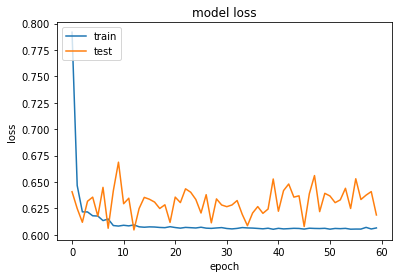

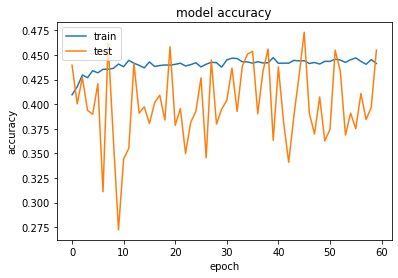

In [24]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
#Second we train the whole model's layers

for layer in FullModel.layers[0:19]:
    layer.trainable = True

FullModel.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


history = FullModel.fit(EDtraining_padded, training_labels1, batch_size=128, epochs=70, validation_data=(EDtesting_padded, testing_labels1), verbose=1)

Epoch 1/70
120/120 [==============================] - 57s 450ms/step - loss: 0.6110 - accuracy: 0.4420 - val_loss: 6.9516 - val_accuracy: 0.1626
Epoch 2/70
120/120 [==============================] - 55s 456ms/step - loss: 0.6124 - accuracy: 0.4412 - val_loss: 1.5532 - val_accuracy: 0.1614
Epoch 3/70
120/120 [==============================] - 53s 442ms/step - loss: 0.6061 - accuracy: 0.4451 - val_loss: 7.9303 - val_accuracy: 0.1608
Epoch 4/70
120/120 [==============================] - 53s 438ms/step - loss: 0.6057 - accuracy: 0.4458 - val_loss: 0.6409 - val_accuracy: 0.3345
Epoch 5/70
120/120 [==============================] - 55s 461ms/step - loss: 0.6029 - accuracy: 0.4463 - val_loss: 0.7297 - val_accuracy: 0.3339
Epoch 6/70
120/120 [==============================] - 52s 435ms/step - loss: 0.6029 - accuracy: 0.4520 - val_loss: 0.6509 - val_accuracy: 0.3462
Epoch 7/70
120/120 [==============================] - 53s 443ms/step - loss: 0.6013 - accuracy: 0.4559 - val_loss: 0.6662 - val_ac

In [26]:
pred1=FullModel.predict(testing_padded)
pred11=[]
for i in pred1:
  if i[0]==max(i):
    pred11.append(0)
  elif i[1]==max(i):
    pred11.append(1)
  else:
    pred11.append(2)
#rounded_labels11=np.argmax(pred11, axis=1).astype(int)
cm = confusion_matrix(testing_labels, pred11)
cm

array([[ 23, 983,  16],
       [  0, 277,   0],
       [  0, 372,  33]])

In [27]:
from sklearn.metrics import classification_report
print(classification_report(testing_labels, pred11, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04      1022
           1       0.17      1.00      0.29       277
           2       0.67      0.08      0.15       405

    accuracy                           0.20      1704
   macro avg       0.61      0.37      0.16      1704
weighted avg       0.79      0.20      0.11      1704



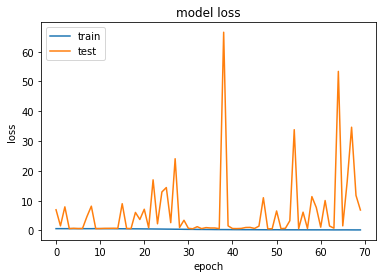

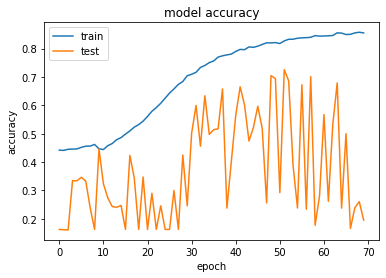

In [28]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
EncoModel.save('AutoEncoderModelBalanced.h5')
FullModel.save('FullModelArticleApproachBalanced.h5')

In [ ]:
#Then we save the model
FullModel.save_weights('autoencoder_classification.h5')

#Terms
##BURT: is a transformar model
##Sentiment Classification: A prabability distrubution over two classes
##Text Encoding: How to encode the texts into a numerical presentation that we can be handled by the machine learning model
##Transformers: The State-Of-The-Art architecture for language modeling
#Word2vec: 2013, The Model that introduced distributed representations for language modeling